In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as svm
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ds = pd.read_csv("/content/drive/MyDrive/datasets/Project4/spam.csv", encoding='latin1')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
ds.shape

(5572, 5)

In [5]:
ds.head(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN


In [6]:
ds.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [7]:
ds.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
ds = ds.drop(ds[to_drop], axis=1)

ds.rename(columns = {"v1":"Type", "v2":"Text"}, inplace = True)
ds.head()

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
ds.head(7)

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


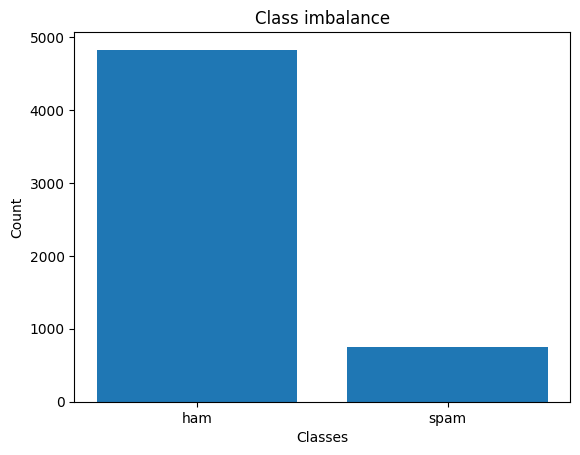

In [18]:
classes = ds['Type'].unique()
count = ds['Type'].value_counts()

plt.bar(classes, count)
plt.title("Class imbalance")

plt.xlabel("Classes")
ylabel = plt.ylabel("Count")

plt.show()

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
ds["No_of_Characters"] = ds["Text"].apply(len)
ds["No_of_Words"]=ds.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
ds["No_of_sentence"]=ds.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

ds.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


In [23]:
ds = ds[(ds["No_of_Characters"]<350)]
ds.shape

(5548, 5)

In [24]:
import re

def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

ds["Clean_Text"] = ds["Text"].apply(Clean)

<ipython-input-24-59ce77a5053f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["Clean_Text"] = ds["Text"].apply(Clean)


In [25]:
ds["Tokenize_Text"]=ds.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

<ipython-input-25-bb4f78ea72e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["Tokenize_Text"]=ds.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)


In [27]:
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

ds["Nostopword_Text"] = ds["Tokenize_Text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-27-05bb5a50e6c9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["Nostopword_Text"] = ds["Tokenize_Text"].apply(remove_stopwords)


In [30]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

ds["Lemmatized_Text"] = ds["Nostopword_Text"].apply(lemmatize_word)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
corpus= []
for i in ds["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature
x.dtype

dtype('float64')

In [34]:
label_encoder = LabelEncoder()
ds["Type"] = label_encoder.fit_transform(ds["Type"])

In [35]:
y = ds["Type"]

In [36]:
ds.shape

(5548, 9)

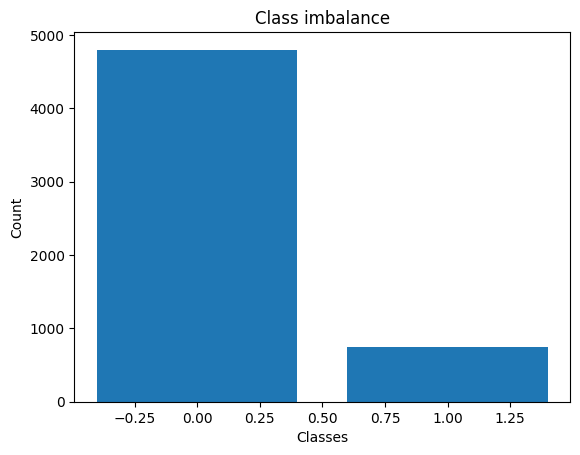

In [37]:
classes = ds['Type'].unique()
count = ds['Type'].value_counts()

plt.bar(classes, count)
plt.title("Class imbalance")

plt.xlabel("Classes")
ylabel = plt.ylabel("Count")

plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
rdF = RF(n_estimators=20, max_depth=100,random_state=64)
rdF.fit(x_train, y_train)
pred = rdF.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(classification_report(pred, y_test, labels=None, digits=4))

[[972   2]
 [ 24 112]]
              precision    recall  f1-score   support

           0     0.9979    0.9759    0.9868       996
           1     0.8235    0.9825    0.8960       114

    accuracy                         0.9766      1110
   macro avg     0.9107    0.9792    0.9414      1110
weighted avg     0.9800    0.9766    0.9775      1110



Confusion matrix, without normalization
[[972   2]
 [ 24 112]]


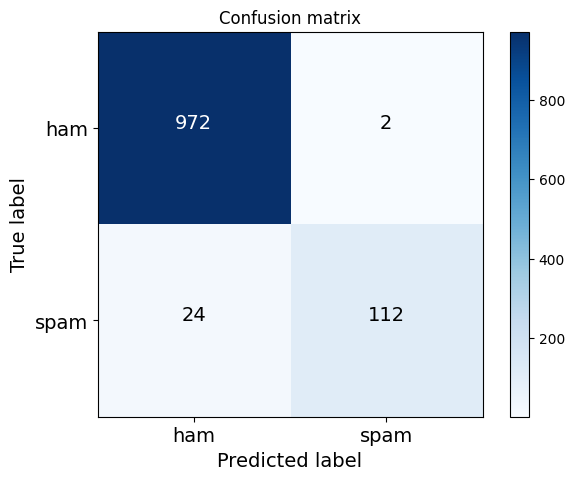

In [46]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['ham', 'spam']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [47]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None, digits=4))

naive_bayes
0.8522522522522522
              precision    recall  f1-score   support

           0     0.8480    0.9810    0.9097       842
           1     0.8824    0.4478    0.5941       268

    accuracy                         0.8523      1110
   macro avg     0.8652    0.7144    0.7519      1110
weighted avg     0.8563    0.8523    0.8335      1110



Confusion matrix, without normalization
[[826 148]
 [ 16 120]]


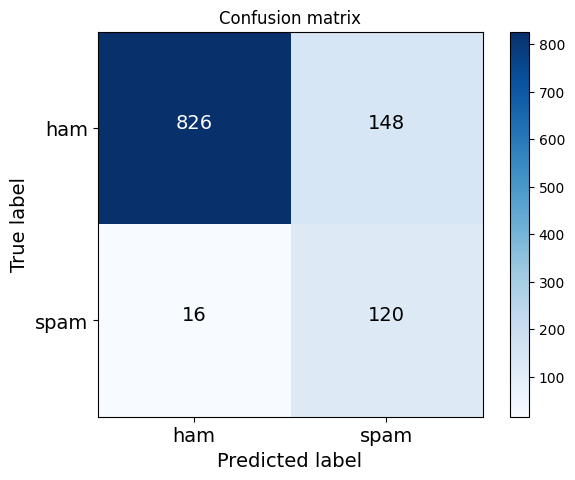

In [48]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['ham', 'spam']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [49]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
pred = bnb.predict(x_test)
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None, digits=4))

naive_bayes
0.9819819819819819
              precision    recall  f1-score   support

           0     0.9959    0.9838    0.9898       986
           1     0.8824    0.9677    0.9231       124

    accuracy                         0.9820      1110
   macro avg     0.9391    0.9758    0.9564      1110
weighted avg     0.9832    0.9820    0.9823      1110



Confusion matrix, without normalization
[[970   4]
 [ 16 120]]


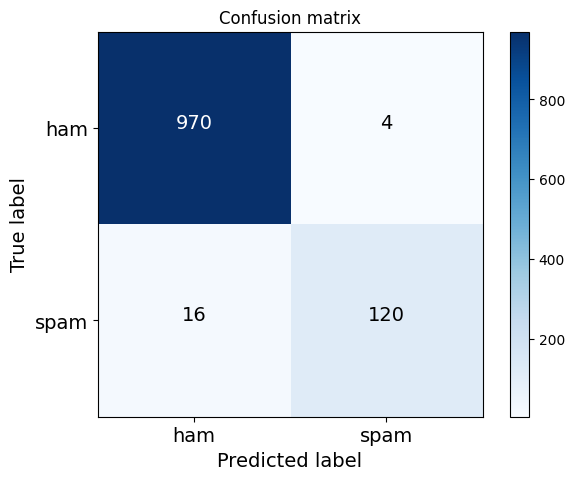

In [50]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['ham', 'spam']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [51]:
xgb_clf = XGBClassifier()

In [52]:
xgb_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=1, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
xgb_clf.fit(x_train, y_train)

pred = xgb_clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(classification_report(pred, y_test, labels=None, digits=4))

[[968   6]
 [ 19 117]]
              precision    recall  f1-score   support

           0     0.9938    0.9807    0.9873       987
           1     0.8603    0.9512    0.9035       123

    accuracy                         0.9775      1110
   macro avg     0.9271    0.9660    0.9454      1110
weighted avg     0.9790    0.9775    0.9780      1110



Confusion matrix, without normalization
[[968   6]
 [ 19 117]]


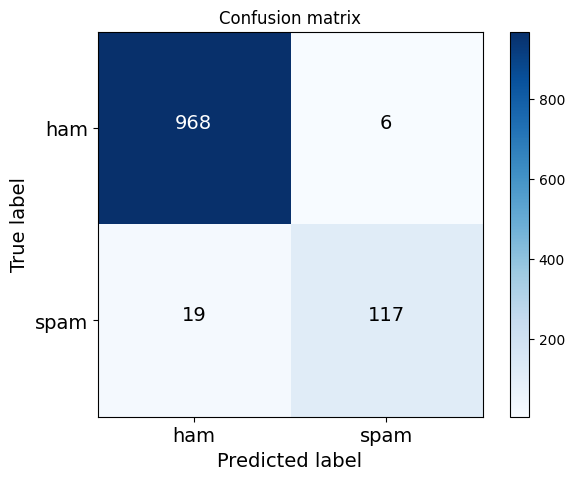

In [54]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['ham', 'spam']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [56]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

pred = clf.predict(x_test)

accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None, digits=4))

DecisionTreeClassifier()
0.9612612612612612
              precision    recall  f1-score   support

           0     0.9815    0.9745    0.9780       981
           1     0.8162    0.8605    0.8377       129

    accuracy                         0.9613      1110
   macro avg     0.8988    0.9175    0.9079      1110
weighted avg     0.9623    0.9613    0.9617      1110



Confusion matrix, without normalization
[[956  18]
 [ 25 111]]


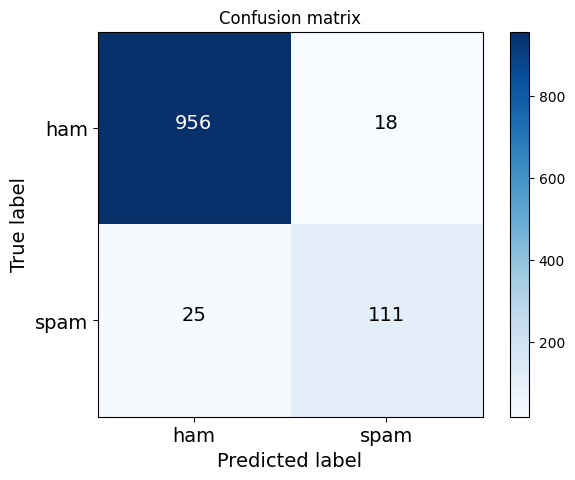

In [57]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['ham', 'spam']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [58]:
forestG = RF(criterion = "gini", max_depth = 100, min_samples_split=9, random_state=54)
forestG.fit(x_train , y_train)
pred = forestG.predict(x_test)
cm = confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred, labels=None, digits=4))

0.9783783783783784
              precision    recall  f1-score   support

           0     0.9760    1.0000    0.9878       974
           1     1.0000    0.8235    0.9032       136

    accuracy                         0.9784      1110
   macro avg     0.9880    0.9118    0.9455      1110
weighted avg     0.9789    0.9784    0.9775      1110



Confusion matrix, without normalization
[[974   0]
 [ 24 112]]


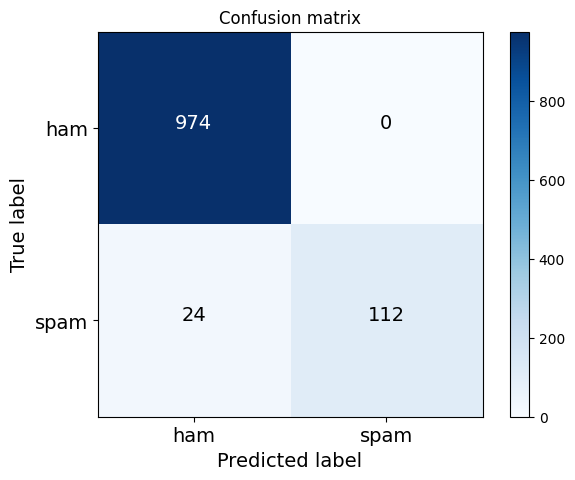

In [59]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['ham', 'spam']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [62]:
clf = svm()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred, labels=None, digits=4))

0.9747747747747748
              precision    recall  f1-score   support

           0     0.9730    0.9990    0.9858       974
           1     0.9909    0.8015    0.8862       136

    accuracy                         0.9748      1110
   macro avg     0.9820    0.9002    0.9360      1110
weighted avg     0.9752    0.9748    0.9736      1110



Confusion matrix, without normalization
[[973   1]
 [ 27 109]]


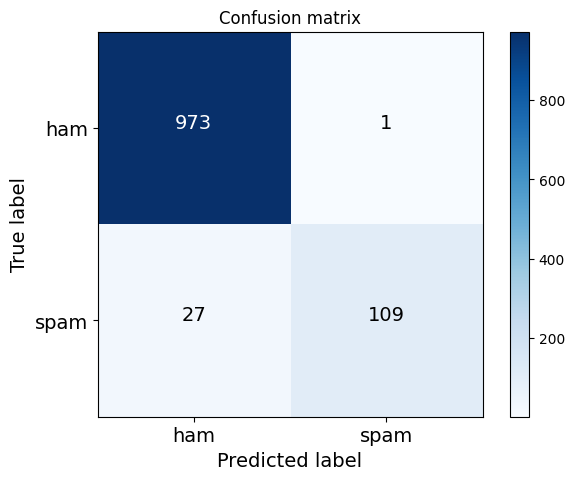

In [63]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['ham', 'spam']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [69]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
%time clf.fit(x_train, y_train)
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred, labels=None, digits=4))

CPU times: user 162 ms, sys: 31.2 ms, total: 193 ms
Wall time: 155 ms
0.963963963963964
              precision    recall  f1-score   support

           0     0.9606    1.0000    0.9799       974
           1     1.0000    0.7059    0.8276       136

    accuracy                         0.9640      1110
   macro avg     0.9803    0.8529    0.9037      1110
weighted avg     0.9654    0.9640    0.9612      1110



Confusion matrix, without normalization
[[974   0]
 [ 40  96]]


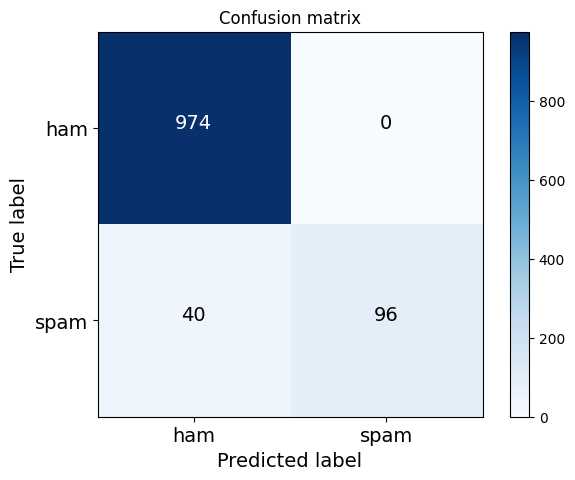

In [70]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['ham', 'spam']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)